In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

Data Cleaning

In [3]:
df.price.describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


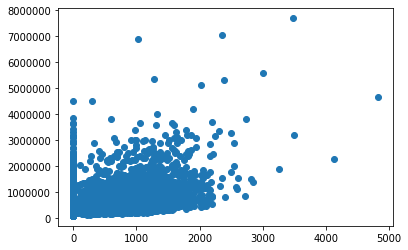

In [5]:
plt.scatter(x='sqft_basement', y='price', data=df)

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [7]:
price_outliers = df.loc[df['price'] > 6500000]
price_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6903,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7519,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
10366,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [8]:
#drop price outliers
df.drop(index=[6903, 7519, 10366], inplace=True)

In [9]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.728700e+04,1.728700e+04,17287.000000,17287.000000,17287.000000,1.728700e+04,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000
mean,4.564803e+09,5.395811e+05,3.372071,2.111138,2079.975878,1.524047e+04,1.490195,0.007925,0.238040,3.408515,7.653613,1788.163996,291.811882,1970.795569,83.590154,98078.198357,47.560045,-122.214251,1987.613814,12871.256898
std,2.874363e+09,3.628164e+05,0.938920,0.767829,913.038147,4.230768e+04,0.538873,0.088672,0.774368,0.651322,1.173136,824.766150,442.211253,29.340585,399.835956,53.608496,0.138421,0.140867,684.266413,27228.667511
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.209500e+05,3.000000,1.500000,1430.000000,5.080500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471150,-122.329000,1490.000000,5111.000000
50%,3.902600e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571500,-122.230000,1840.000000,7622.000000
75%,7.300555e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.677950,-122.126000,2360.000000,10101.000000
max,9.900000e+09,5.570000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [10]:
#remove bathroom outliers
bathroom_outliers = df.loc[df['bathrooms'] >= 6].index
df.drop(index=bathroom_outliers, inplace=True)
# list_bathroomoutliers = list(bathroom_outliers.id)  
# list_bathroomoutliers

In [11]:
#remove bedroom outliers
df.loc[df['bedrooms'] >= 10]
df.drop(index=[8597,11181], inplace=True)

In [12]:
#Squarefootage

# df.boxplot(column='sqft_living')
df.drop(df[df['sqft_living'] > 8000].index, inplace = True)

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.727000e+04,1.727000e+04,17270.000000,17270.000000,17270.000000,1.727000e+04,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000,17270.000000
mean,4.565846e+09,5.374039e+05,3.367863,2.107310,2075.031442,1.519301e+04,1.489809,0.007759,0.236479,3.408743,7.650318,1784.737174,290.294268,1970.775970,83.440127,98078.221367,47.560012,-122.214286,1986.346381,12835.245223
std,2.874230e+09,3.522960e+05,0.906925,0.757414,896.141336,4.220910e+04,0.538796,0.087746,0.771031,0.651403,1.167467,815.849130,437.544439,29.341907,399.489758,53.601685,0.138467,0.140857,682.525982,27126.059128
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114825e+09,3.200000e+05,3.000000,1.500000,1430.000000,5.080000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1192.500000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.329000,1490.000000,5110.250000
50%,3.904100e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.636000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571500,-122.230000,1840.000000,7620.000000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2540.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.126000,2360.000000,10092.750000
max,9.900000e+09,5.350000e+06,11.000000,5.750000,8000.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


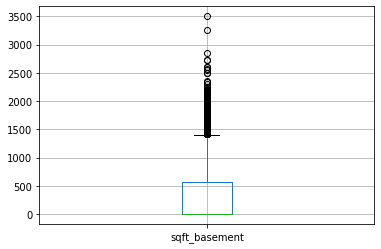

In [14]:
#basements
df.boxplot('sqft_basement')


In [15]:
df.drop(df[df['sqft_basement'] > 2500].index, inplace = True)

In [16]:
# df

# first_half = df.loc[:, 'price': 'floors']
# sec_half = df.loc[:, 'condition': 'long']

In [17]:
sec_half.boxplot(figsize=(15,8))

NameError: name 'sec_half' is not defined

EDA
    
    -Look at distribution of the variables
    
    -Measure correlation between variables
    -Check if categoricial data is ordinal
    -CHeck linear relationship with target variable
    -knowing the sample statistics of the target and features
    
    -Determine stastistical tests to determine relationships between features and target

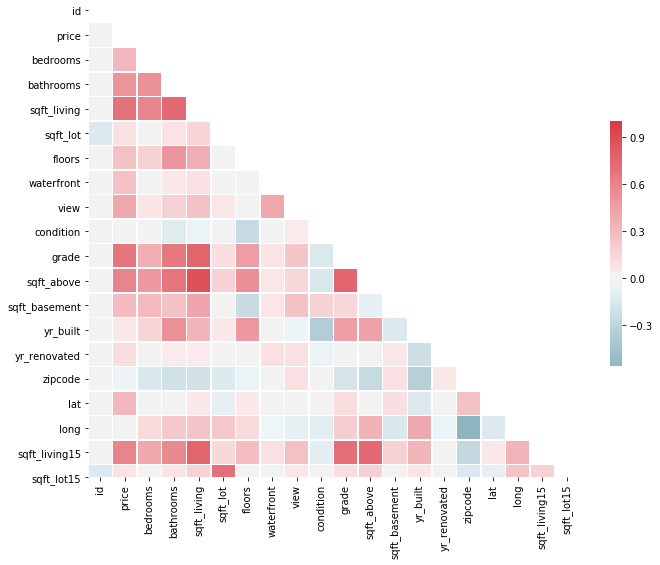

In [18]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.zipcode = df.zipcode.astype(str)

Data Engineering

In [20]:
#create new column of price per square feet

df['total_sqft'] = df['sqft_living'] + df['sqft_above'] + df['sqft_basement']

In [21]:
df['price_per_squareft'] = df['price'] / df['total_sqft']

In [22]:
df.zipcode

0        98058
1        98115
2        98006
3        98034
4        98052
         ...  
17285    98008
17286    98105
17287    98028
17288    98038
17289    98155
Name: zipcode, Length: 17261, dtype: object

In [23]:
#create dummy variable for zipcode



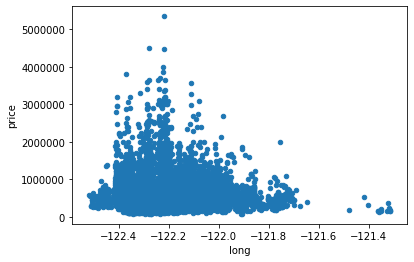

In [24]:
df.plot(kind='scatter', x='long', y='price')

In [35]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft',
       'price_per_squareft'],
      dtype='object')

In [36]:
X_train = df[['sqft_living', 'view', 'condition', 'yr_built', 'long']]

In [26]:
X_train
zero_dict = {'NaN': 0}

In [37]:
X_train

,sqft_living,view,condition,yr_built,long
0,2070,0,4,1986,-122.162
1,2900,0,5,1977,-122.285
2,3770,2,3,1997,-122.129
3,4560,2,3,1990,-122.228
4,2550,0,3,2004,-122.083
...,...,...,...,...,...
17285,3240,1,3,1958,-122.112
17286,1300,0,3,1948,-122.288
17287,1050,0,3,1953,-122.262
17288,1900,0,4,1971,-121.990


In [28]:
dummies.replace(zero_dict)

NameError: name 'dummies' is not defined

In [38]:
y_train = df.price

In [39]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)

0.5523296134264135

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
y_train

0         365000.0
1         865000.0
2        1038000.0
3        1490000.0
4         711000.0
           ...    
17285     750000.0
17286     440000.0
17287     310000.0
17288     427500.0
17289     348000.0
Name: price, Length: 17261, dtype: float64

In [42]:
scale = MinMaxScaler()
transformed = scale.fit_transform(X_train)
X_train_scaled = pd.DataFrame(transformed, columns = X_train.columns)

In [62]:
transformed = scale.fit_transform(y_train)
Y_train_scaled = pd.DataFrame(transformed, columns = y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 365000.  865000. 1038000. ...  310000.  427500.  348000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [61]:
lr_clf1 = LinearRegression()
lr_clf1.fit(X_train_scaled, y_train)
lr_clf1.score(X_train_scaled, y_train)

0.5523296134264135

In [64]:
import pickle
with open('kings_county_home_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [32]:
import json
columns = {'data-columns': [col.lower() for col in X_train.columns]}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [63]:
lr_clf.score(X_train, y_train)

0.5523296134264135

Bring in the test set
    

In [65]:
X_train

,sqft_living,view,condition,yr_built,long
0,2070,0,4,1986,-122.162
1,2900,0,5,1977,-122.285
2,3770,2,3,1997,-122.129
3,4560,2,3,1990,-122.228
4,2550,0,3,2004,-122.083
...,...,...,...,...,...
17285,3240,1,3,1958,-122.112
17286,1300,0,3,1948,-122.288
17287,1050,0,3,1953,-122.262
17288,1900,0,4,1971,-121.990
